<a href="https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/279_An_introduction_to_object_segmentation_using_StarDist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/3yk9sBja7YI

**An introduction to nuclei (object) segmentation using StarDist (in python)**
https://github.com/stardist/stardist

by Dr. Sreenivas Bhattiprolu
as part of python tutorials on the DigitalSreeni YouTube channel

In [ ]:
!pip install stardist

In [ ]:
from stardist.models import StarDist2D 
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt


In [ ]:
# prints a list of available models 
StarDist2D.from_pretrained() 

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None


**Example 1: Nuclei segmentation in Fluorescence images**

In [ ]:
# Define a pretrained model to segment nuclei in fluorescence images (download from pretrained)
model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
5332992/5320433 [==============================] - 0s 0us/step
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


Text(0.5, 1.0, 'prediction + input overlay')

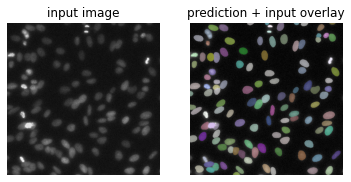

In [ ]:
img = test_image_nuclei_2d() 

labels, _ = model.predict_instances(normalize(img))

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img=img))
plt.axis("off")
plt.title("prediction + input overlay")

**Example 2: Segmenting custom fluorescence image segmentation**

using a pre-trained model.

In [ ]:
from skimage import io

In [ ]:
my_fl_img = io.imread("/content/drive/MyDrive/Colab Notebooks/data/nuclei.jpg", as_gray=True)

#Smaller crop for closer inspection
my_fl_img = my_fl_img[800:1000, 800:1000]

(-0.5, 199.5, 199.5, -0.5)

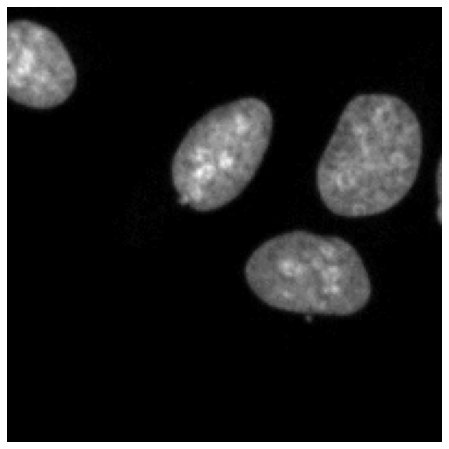

In [ ]:

plt.figure(figsize=(8,8))
plt.imshow(my_fl_img, cmap='gray')
plt.axis("off")

In [ ]:
my_fl_labels, my_fl_details = model.predict_instances(normalize(my_fl_img))

Text(0.5, 1.0, 'prediction + input overlay')

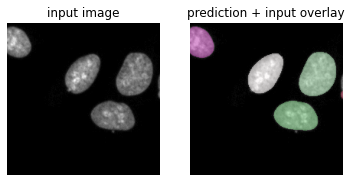

In [ ]:
plt.subplot(1,2,1)
plt.imshow(my_fl_img, cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(my_fl_labels, img=my_fl_img))
plt.axis("off")
plt.title("prediction + input overlay")

Visualize polygons (work on large objects for better visualization)

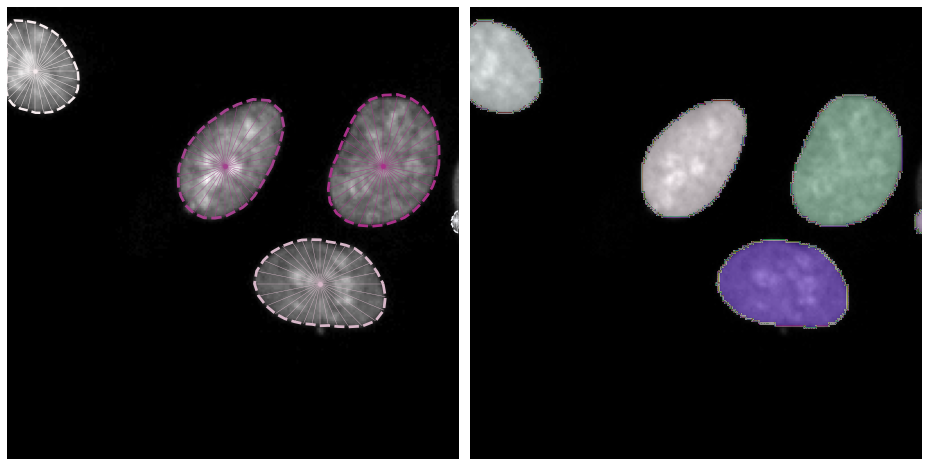

In [ ]:
from stardist import random_label_cmap, _draw_polygons, export_imagej_rois
import numpy as np
np.random.seed(6)
lbl_cmap = random_label_cmap()

plt.figure(figsize=(13,10))
img_show = my_fl_img if my_fl_img.ndim==2 else my_fl_img[...,0]
coord, points, prob = my_fl_details['coord'], my_fl_details['points'], my_fl_details['prob']
plt.subplot(121); plt.imshow(img_show, cmap='gray'); plt.axis('off')
a = plt.axis()
_draw_polygons(coord, points, prob, show_dist=True)
plt.axis(a)
plt.subplot(122); plt.imshow(img_show, cmap='gray'); plt.axis('off')
plt.imshow(my_fl_labels, cmap=lbl_cmap, alpha=0.5)
plt.tight_layout()
plt.show()

**Example 3: H&E image segmentation**

using a pre-trained model

In [ ]:
from skimage import io

In [ ]:
#Image URL: https://imagebank.hematology.org/getimagebyid/62996?size=3
HE_img = io.imread("/content/drive/MyDrive/Colab Notebooks/data/HE_images/HE_downloaded.jpg")

In [ ]:
HE_model = StarDist2D.from_pretrained('2D_versatile_he')

Found model '2D_versatile_he' for 'StarDist2D'.
5308416/5294730 [==============================] - 0s 0us/step
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


In [ ]:
he_labels, _ = HE_model.predict_instances(normalize(HE_img))

Text(0.5, 1.0, 'prediction')

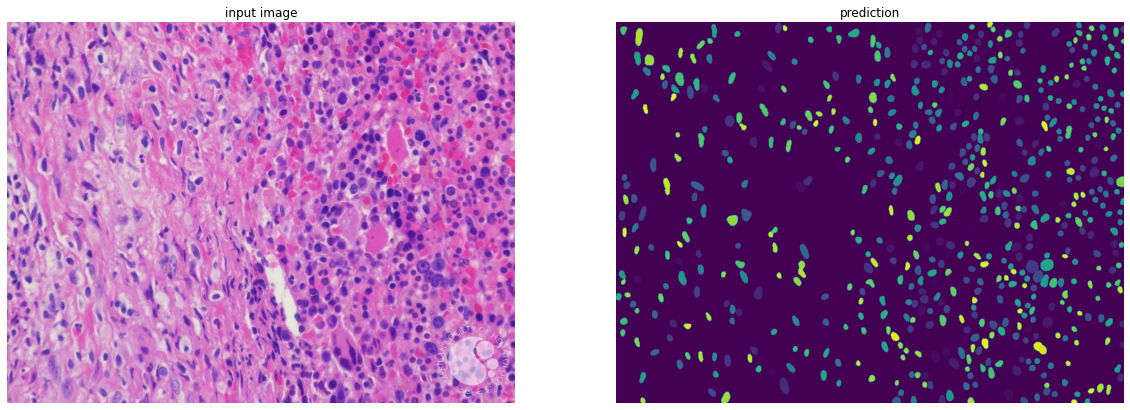

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1,2,1)
plt.imshow(HE_img, cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(he_labels)
plt.axis("off")
plt.title("prediction")

**Example 4: How to train and segment custom images?**

Convered in detail in the next tutorial

In [ ]:
from stardist.models import StarDist2D
from csbdeep.utils import Path, normalize

In [ ]:
model = StarDist2D(None, name='stardist', basedir='/content/drive/MyDrive/Colab Notebooks/models')
my_img = io.imread("/content/drive/MyDrive/Colab Notebooks/data/mitochondria/small_dataset_for_training/images/12_training_mito_images.tif")

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.562851, nms_thresh=0.3.


(-0.5, 1023.5, 767.5, -0.5)

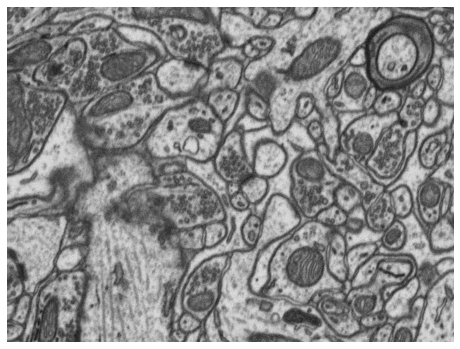

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(my_img[7], cmap='gray')
plt.axis('off')

In [ ]:
my_img_norm = normalize(my_img[7], 1,99.8, axis=(0,1))
segmented_img, details_img = model.predict_instances(my_img_norm, verbose=True)

predicting instances with nms_thresh = 0.3
non-maximum suppression...
keeping 16/1741 polyhedra
NMS took 0.0284 s


(-0.5, 1023.5, 767.5, -0.5)

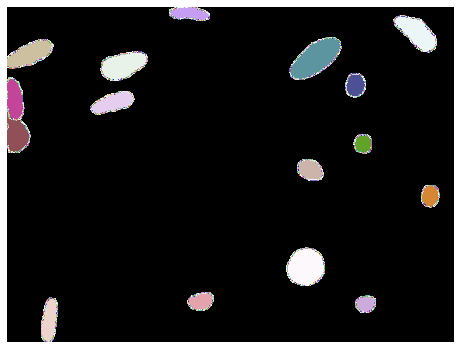

In [ ]:
plt.figure(figsize=(8,8))
#plt.imshow(my_img_norm if my_img_norm.ndim==2 else my_img_norm[...,0], clim=(0,1), cmap='gray')
plt.imshow(segmented_img, cmap=lbl_cmap, alpha=1)
plt.axis('off')

**Example 5: Segmenting whole slide images**

covered in the upcoming tutorial (tutorial after the next)